<img style="text-align:center;display:inline-block;margin-left:40px" src="https://viso.ai/wp-content/uploads/2023/12/Object-Detection-Architecture-Structre.png"  alt="YOLO">

In [ ]:
!pip install ultralytics
from ultralytics import YOLO

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

!pip install -q kaggle
!mkdir -p ~/.kaggle

from google.colab import files
files.upload()


!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


Mounted at /content/drive


Saving kaggle.json to kaggle.json


In [ ]:
!kaggle datasets download -d abdulhasibuddin/plant-doc-dataset
!unzip -q plant-doc-dataset.zip -d plantdoc

Dataset URL: https://www.kaggle.com/datasets/abdulhasibuddin/plant-doc-dataset
License(s): unknown


In [ ]:
import os
import shutil

# Préparation des chemins
base_path = '/content/plantdoc/PlantDoc-Dataset'
output_path = '/content/plantdoc_yolo'
os.makedirs(output_path, exist_ok=True)

# Liste des classes
splits = ['train', 'test']
class_names = sorted(os.listdir(os.path.join(base_path, 'train')))
class_dict = {name: idx for idx, name in enumerate(class_names)}

# Créer les dossiers
for split in splits:
    os.makedirs(f'{output_path}/images/{split}', exist_ok=True)
    os.makedirs(f'{output_path}/labels/{split}', exist_ok=True)

# Fonction de conversion
def convert_dataset(split):
    for class_name in os.listdir(os.path.join(base_path, split)):
        class_id = class_dict[class_name]
        class_dir = os.path.join(base_path, split, class_name)

        for img_file in os.listdir(class_dir):
            if not img_file.lower().endswith(('.jpg', '.jpeg', '.png')):
                continue

            img_src = os.path.join(class_dir, img_file)
            img_dst = os.path.join(output_path, 'images', split, f'{class_name}_{img_file}')
            shutil.copy(img_src, img_dst)

            label_path = img_dst.replace('images', 'labels').rsplit('.', 1)[0] + '.txt'
            # Dummy box: image entière
            with open(label_path, 'w') as f:
                f.write(f"{class_id} 0.5 0.5 1.0 1.0\n")

convert_dataset('train')
convert_dataset('test')


In [ ]:
names = list(class_dict.keys())

with open('/content/plantdoc_yolo/dataset.yaml', 'w') as f:
    f.write('path: /content/plantdoc_yolo\n')
    f.write('train: images/train\n')
    f.write('val: images/test\n')
    f.write(f'nc: {len(names)}\n')
    f.write('names: [')
    f.write(', '.join([f"'{name}'" for name in names]))
    f.write(']\n')


In [11]:
from ultralytics import YOLO

model = YOLO('yolov8n.pt')

results = model.train(
    data='/content/plantdoc_yolo/dataset.yaml',
    epochs=5,
    imgsz=416,
    batch=8,
    name='plantdoc_yolov8n'
)


Ultralytics 8.3.127 🚀 Python-3.11.12 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/plantdoc_yolo/dataset.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=5, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=416, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=plantdoc_yolov8n4, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.

train: Scanning /content/plantdoc_yolo/labels/train.cache... 2316 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2316/2316 [00:00<?, ?it/s]

train: /content/plantdoc_yolo/images/train/Apple Scab Leaf_Apple Scab Leaf (51).jpg: corrupt JPEG restored and saved
train: /content/plantdoc_yolo/images/train/Apple rust leaf_Apple rust leaf (8).jpg: corrupt JPEG restored and saved
train: /content/plantdoc_yolo/images/train/Blueberry leaf_Blueberry leaf (22).jpg: corrupt JPEG restored and saved
train: /content/plantdoc_yolo/images/train/Potato leaf late blight_Potato leaf late blight (9).jpg: corrupt JPEG restored and saved
train: /content/plantdoc_yolo/images/train/Strawberry leaf_Strawberry leaf (6).jpg: corrupt JPEG restored and saved
train: /content/plantdoc_yolo/images/train/Strawberry leaf_Strawberry leaf (81).jpg: corrupt JPEG restored and saved
train: /content/plantdoc_yolo/images/train/Tomato mold leaf_Tomato mold leaf (7).jpg: corrupt JPEG restored and saved
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, c


val: Scanning /content/plantdoc_yolo/labels/test.cache... 236 images, 0 backgrounds, 0 corrupt: 100%|██████████| 236/236 [00:00<?, ?it/s]

val: /content/plantdoc_yolo/images/test/Apple rust leaf_Apple rust leaf (1).jpg: corrupt JPEG restored and saved
Plotting labels to runs/detect/plantdoc_yolov8n4/labels.jpg... 


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000323, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 416 train, 416 val
Using 0 dataloader workers
Logging results to runs/detect/plantdoc_yolov8n4
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/5         0G     0.3177       3.73      1.029         11        416: 100%|██████████| 290/290 [15:41<00:00,  3.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:31<00:00,  2.12s/it]

                   all        236        236     0.0369      0.906      0.118      0.116



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/5         0G     0.2016      3.028     0.9531          8        416: 100%|██████████| 290/290 [15:27<00:00,  3.20s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:31<00:00,  2.10s/it]

                   all        236        236      0.191      0.402      0.211      0.205



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/5         0G     0.1865       2.59     0.9476         12        416: 100%|██████████| 290/290 [15:25<00:00,  3.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:31<00:00,  2.11s/it]

                   all        236        236      0.296      0.418      0.319       0.31



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/5         0G     0.1658      2.338      0.932         16        416: 100%|██████████| 290/290 [15:18<00:00,  3.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:31<00:00,  2.07s/it]

                   all        236        236      0.323      0.524      0.394      0.379



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/5         0G     0.1444      2.216     0.9225         12        416: 100%|██████████| 290/290 [15:15<00:00,  3.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:31<00:00,  2.07s/it]

                   all        236        236      0.322      0.526      0.423      0.412



5 epochs completed in 1.330 hours.
Optimizer stripped from runs/detect/plantdoc_yolov8n4/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/plantdoc_yolov8n4/weights/best.pt, 6.2MB

Validating runs/detect/plantdoc_yolov8n4/weights/best.pt...
Ultralytics 8.3.127 🚀 Python-3.11.12 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 72 layers, 3,010,913 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:29<00:00,  1.96s/it]


                   all        236        236      0.322      0.525      0.422      0.412
       Apple Scab Leaf         10         10      0.188        0.6      0.293      0.292
            Apple leaf          9          9       0.19      0.889      0.511      0.484
       Apple rust leaf         10         10      0.168        0.5      0.344      0.344
      Bell_pepper leaf          8          8      0.206      0.125      0.236      0.236
 Bell_pepper leaf spot          9          9          1          0     0.0769     0.0769
        Blueberry leaf         11         11      0.146      0.364      0.197      0.147
           Cherry leaf         10         10          1          0      0.362      0.362
   Corn Gray leaf spot          4          4       0.17       0.75      0.262      0.258
      Corn leaf blight         12         12      0.578      0.833      0.783      0.783
        Corn rust leaf         10         10      0.481          1      0.892      0.861
            Peach lea

In [15]:
metrics = model.val()
print(f"mAP50: {metrics.box.map50:.4f}")
print(f"mAP50-95: {metrics.box.map:.4f}")

Ultralytics 8.3.127 🚀 Python-3.11.12 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1658.0±846.9 MB/s, size: 551.7 KB)


val: Scanning /content/plantdoc_yolo/labels/test.cache... 236 images, 0 backgrounds, 0 corrupt: 100%|██████████| 236/236 [00:00<?, ?it/s]

val: /content/plantdoc_yolo/images/test/Apple rust leaf_Apple rust leaf (1).jpg: corrupt JPEG restored and saved



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 30/30 [00:35<00:00,  1.17s/it]


                   all        236        236       0.32      0.533      0.419      0.409
       Apple Scab Leaf         10         10       0.19        0.6      0.305      0.304
            Apple leaf          9          9      0.165      0.778      0.513      0.487
       Apple rust leaf         10         10      0.167      0.522      0.297      0.297
      Bell_pepper leaf          8          8      0.223      0.147      0.248      0.248
 Bell_pepper leaf spot          9          9          1          0     0.0771     0.0771
        Blueberry leaf         11         11      0.175      0.455      0.202      0.153
           Cherry leaf         10         10      0.845        0.1      0.303      0.303
   Corn Gray leaf spot          4          4      0.151       0.75      0.225      0.221
      Corn leaf blight         12         12      0.594      0.854       0.81       0.81
        Corn rust leaf         10         10      0.476          1      0.886      0.856
            Peach lea

In [ ]:
model_path = '/content/plantdoc_yolov8n.pt'
model.save(model_path)

In [16]:
from google.colab import files
files.download(model_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# TEST WITH IMAGE UPLODED


image 1/1 /content/IMG-common-rust-later-development-Pioneer-NA_US-V1.jpg: 256x416 1 Corn rust leaf, 87.8ms
Speed: 1.7ms preprocess, 87.8ms inference, 1.3ms postprocess per image at shape (1, 3, 256, 416)
Results saved to runs/detect/predict13


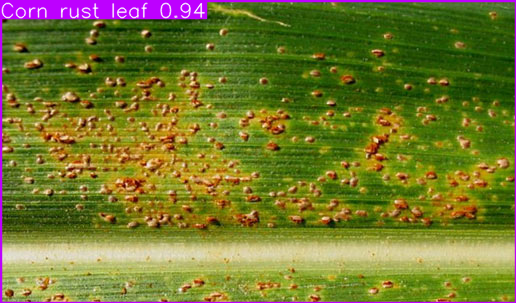

In [39]:
from ultralytics import YOLO

# Charger le modèle entraîné
model = YOLO('/content/plantdoc_yolov8n.pt')  # ou le chemin vers votre meilleur modèle

# Tester sur une image
results = model.predict(
    source='/content/IMG-common-rust-later-development-Pioneer-NA_US-V1.jpg',  # ou un dossier d'images
    conf=0.5,  # seuil de confiance
    save=True,  # sauvegarder les résultats
    show_labels=True,
    show_conf=True
)

# Afficher les résultats (dans Colab)
for result in results:
    result.show()

# FIN